In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:

np.random.seed(42)
tails=0
heads=0

for i in np.arange(0,10,1):
    flip=np.random.random()
    if flip>=0.5:
        print('tails')
        tails=tails+1
    else:
        print('heads')
        heads=heads+1
        
print(tails)
print(heads)

heads
tails
tails
tails
heads
heads
heads
tails
tails
tails
6
4


In [29]:
n_all_heads=0

for _ in np.arange(1,10000):
    heads=np.random.random(size=4) <0.5
    n_heads=np.sum(heads)
    if n_heads==4:
        n_all_heads+=1

n_all_heads/10000

0.0625

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


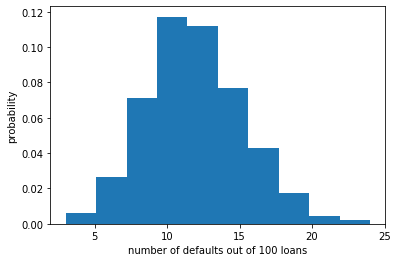

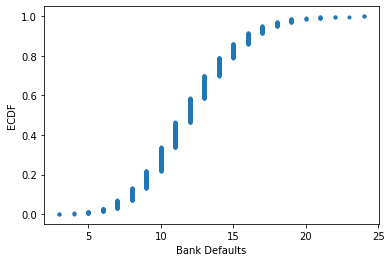

Probability of losing money = 0.782


In [44]:
def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

def perform_bernoulli_trials(n, p):
    #Perform n Bernoulli trials with success probability p   and return number of successes.
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in np.arange(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults

n_defaults=np.empty(1000)
# Compute the number of defaults
for i in np.arange(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.12)


# Plot the histogram with default number of bins; label your axes
plt.clf()
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

x,y=ecdf(n_defaults)
# Plot the ECDF with labeled axes

plt.clf()
_=plt.plot(x,y,marker='.', linestyle='none')
_=plt.xlabel('Bank Defaults')
_=plt.ylabel('ECDF')


# Show the plot

plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money

n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


